In [2]:
%matplotlib widget
%env CLEARML_WEB_HOST=https://app.clear.ml
%env CLEARML_API_HOST=https://api.clear.ml
%env CLEARML_FILES_HOST=https://files.clear.ml
%env CLEARML_API_ACCESS_KEY=Z07DOYC023WXEQJ0WRMZ
%env CLEARML_API_SECRET_KEY=EHPtYtLpKmRTyduuLEcf8mlUiGjXsJtzfkO1HEEOuUA3mC72qp
from PIL import Image
import pylidc as pl
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

env: CLEARML_WEB_HOST=https://app.clear.ml
env: CLEARML_API_HOST=https://api.clear.ml
env: CLEARML_FILES_HOST=https://files.clear.ml
env: CLEARML_API_ACCESS_KEY=Z07DOYC023WXEQJ0WRMZ
env: CLEARML_API_SECRET_KEY=EHPtYtLpKmRTyduuLEcf8mlUiGjXsJtzfkO1HEEOuUA3mC72qp


In [2]:
dataset = pl.query(pl.Scan).all()
print(len(dataset))

1018


In [5]:
train_image_path = '../datasets/lidc-idri/images/train/'
train_label_path = '../datasets/lidc-idri/labels/train/'

test_image_path = 'datasets/lidc-idri/images/test/'
test_label_path = 'datasets/lidc-idri/labels/test/'

val_image_path = 'datasets/lidc-idri/images/val/'
val_label_path = 'datasets/lidc-idri/labels/val/'

In [32]:
# Buat tau terdapat seberapa banyak foto training yang digenerate untuk setiap cluster nodule yang terdeteksi pada sebuah CT scan
# Hasilnya 

file_name_arr = []

for data in dataset:
    filename = data.patient_id
    nodes = data.cluster_annotations()
    for node in nodes:
        annot_centroids = [] 
        for annot in node:
            annot_centroids.append(annot.centroid)       
        annot_centroids_tp = list(zip(*annot_centroids))
        annot_centroid_avg = [sum(centroid_tp) / len(centroid_tp) for centroid_tp in annot_centroids_tp]
        annot_slice = int(round(annot_centroid_avg[2]))
        
        file_name_arr.append(filename + '-' + str(annot_slice))

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some n

In [39]:
import json
with open("normal_slice_mapping.json","r") as file:
    json.dump(unique_indexes, file)

In [19]:
# Buat dapetin index seluruh slice pada tiap imageId yang dideteksi memiliki nodule

dataset = pl.query(pl.Scan).all()
id_slice_mapping = {}

for data in dataset:
    id = int(data.patient_id.split('-')[2])
    arr = np.zeros(999)
    
    nodes = data.cluster_annotations()
    for node in nodes:
        for annot in node:
            slice_range = annot.bbox_matrix()[-1]
            for i in np.arange(slice_range[0],slice_range[1]):
                arr[i]+=1
                
    indexes = [i for i, value in enumerate(arr) if value > 0]
    
    if id not in id_slice_mapping:
            id_slice_mapping[id] = []
    
    id_slice_mapping[id].extend(indexes)

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some n

In [31]:
# Buat generate data normal dari (by excluding index slice CT yang terdeteksi memiliki nodule)

import random
from PIL import Image

unique_indexes = {}

def generate_unique_indexes(id, upperLimit, images, filename):
    existing_indexes = id_slice_mapping.get(id, [])
    unique_indexes[id] = []
    
    while len(unique_indexes[id]) < 3:
        index = random.randint(0, upperLimit-1)
        if index not in existing_indexes and index not in unique_indexes[id]:
            unique_indexes[id].append(index)
    print(unique_indexes.get(id, []))
    for unique_idx in unique_indexes.get(id, []):
        annot_img = Image.fromarray(images[unique_idx].pixel_array)
        annot_img.save(train_image_path + filename + '-' + str(unique_idx) + '.png')

for data in dataset:
    filename = data.patient_id

    id = int(filename.split('-')[2])
    vol = data.to_volume()
    total_slice = vol.shape[-1]
    images = data.load_all_dicom_images()
    generate_unique_indexes(id, total_slice, images, filename)

Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
[39, 35, 32]
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
[2, 111, 72]
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
[0, 1, 59]
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
[91, 138, 12]
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
[7, 62, 67]
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
[78, 62, 76]
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
[37, 109, 17]
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
[56, 57, 81]
Loading dicom files ... This may take a moment.
Loading dicom files ... This may take a moment.
[71, 92, 60]
Loading dicom files 

In [37]:
# Buat generate data training
import os
import pydicom as dicom
import cv2

clahe = cv2.createCLAHE()
dataset = pl.query(pl.Scan).all()

for data in dataset:
        filename = data.patient_id
        images = data.load_all_dicom_images(verbose=False)
        nodes = data.cluster_annotations()
        dicom_dirpath = data.get_path_to_dicom_files()
        slice_indexes = []
        for node in nodes:
                annot_centroids = []
                annot_bbox_matrices = []
                for annot in node:
                        annot_centroids.append(annot.centroid)
                        annot_bbox_matrices.append(annot.bbox_matrix())
                annot_centroids_tp = list(zip(*annot_centroids))
                annot_bbox_matrices_tp = list(zip(*annot_bbox_matrices))
                
                # Annot_centroid_avg contains x_center, y_center, and image_slice for a nodule discovered within one CT scan
                annot_centroid_avg = [sum(centroid_tp) / len(centroid_tp) for centroid_tp in annot_centroids_tp]
                annot_bbox_matrix_avg = [sum(bbox_tp) / len(bbox_tp) for bbox_tp in annot_bbox_matrices_tp]
                
                # Determine annotation labels
                annot_slice = int(round(annot_centroid_avg[2]))
                annot_x_center = annot_centroid_avg[1]
                annot_y_center = annot_centroid_avg[0]
                annot_width = abs(annot_bbox_matrix_avg[1][1]-annot_bbox_matrix_avg[1][0])
                annot_height = abs(annot_bbox_matrix_avg[0][1]-annot_bbox_matrix_avg[0][0])
                
                # Idenfity Dicom Image metadata
                dicom_path = os.path.join(dicom_dirpath, os.listdir(dicom_dirpath)[annot_slice])
                dicom_image = dicom.read_file(dicom_path)
                rescale_slope = dicom_image.RescaleSlope
                rescale_intercept = dicom_image.RescaleIntercept
                window_centers = dicom_image.WindowCenter
                window_widths = dicom_image.WindowWidth
                
                # Generate image
                hu_values = images[annot_slice].pixel_array
                # Apply rescaling to get pixel values
                pixel_values = (hu_values * rescale_slope) + rescale_intercept
                if isinstance(window_centers, dicom.multival.MultiValue):
                        window_center = window_centers[0]
                else:
                        window_center = window_centers
                if isinstance(window_widths, dicom.multival.MultiValue):
                        window_width = window_widths[0]
                else:
                        window_width = window_widths
                pixel_values = (pixel_values - (window_center - 0.5)) / (window_width - 1) * 255
                # Rescale to 8-bit range
                min_value = pixel_values.min()
                max_value = pixel_values.max()
                displayed_img = ((pixel_values - min_value) * (255 / (max_value - min_value))).astype(np.uint8)
                # # Apply clahe
                # processed_img = clahe.apply(displayed_img)
                annot_img = Image.fromarray(displayed_img)
                annot_x_center /= annot_img.width
                annot_y_center /= annot_img.height
                annot_width /= annot_img.width
                annot_height /= annot_img.height
                
                
                with open(train_label_path + filename + '-' + str(annot_slice) + '.txt', 'a') as file:
                        file.write('0 '+str(annot_x_center)+' '+str(annot_y_center)+' '+str(annot_width)+' '+str(annot_height)+'\n')
                
                annot_img.save(train_image_path + filename + '-' + str(annot_slice) + '.png')

Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some nodules may be close and must be grouped manually.
Failed to reduce all groups to <= 4 Annotations.
Some n

In [17]:
# Preprocess setiap foto dengan CLAHE
import cv2
import os

for filename in os.listdir(train_image_path):
    img = cv2.imread(os.path.join(train_image_path,filename))
    image_bw = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    clahe = cv2.createCLAHE()
    processed_img = clahe.apply(image_bw)
    cv2.imwrite(os.path.join(train_image_path,filename), processed_img)

In [20]:
# move all normal class data to normal folder
import json
import os

train_image_path = 'datasets/lidc-idri/images/train/'
normal_image_path = 'datasets/lidc-idri/images/normal/'
normal_image_suffix = []
normal_image_name = []

with open('normal_slice_mapping.json', 'r') as file:
    data = json.load(file)

normal_image_id = [index for index in data]

for id in normal_image_id:
    slices = data.get(id, [])
    for slice in slices:
        normal_image_suffix.append(str(id)+'-'+str(slice)+'.png')

curr_idx = 0
for file in os.listdir(train_image_path):
    for suffix in normal_image_suffix:
        prefix = ''
        id_length = len(suffix.split('-')[0])
        if (id_length == 3):
            prefix = '0'
        elif (id_length == 2): 
            prefix = '00'
        elif (id_length == 1):
            prefix = '000'
        query = '-' + prefix + suffix
        
        if file.endswith(query):
            normal_image_name.append(file)
            curr_idx = curr_idx + 1

for file in normal_image_name:
    source_path = os.path.join(train_image_path, file)
    dest_path = os.path.join(normal_image_path, file)
    shutil.move(source_path,dest_path)

In [3]:
from ultralytics import YOLO
import os

train_path = 'datasets/lidc-idri/images/train/'
model = YOLO('./train12/weights/best.pt')
train_images = [os.path.join(train_path,x) for x in os.listdir(train_path)]
result = model(train_images[:50], conf=.25)


0: 512x512 (no detections), 1: 512x512 (no detections), 2: 512x512 (no detections), 3: 512x512 (no detections), 4: 512x512 (no detections), 5: 512x512 (no detections), 6: 512x512 (no detections), 7: 512x512 (no detections), 8: 512x512 (no detections), 9: 512x512 (no detections), 10: 512x512 (no detections), 11: 512x512 (no detections), 12: 512x512 (no detections), 13: 512x512 (no detections), 14: 512x512 (no detections), 15: 512x512 (no detections), 16: 512x512 (no detections), 17: 512x512 (no detections), 18: 512x512 (no detections), 19: 512x512 (no detections), 20: 512x512 (no detections), 21: 512x512 (no detections), 22: 512x512 (no detections), 23: 512x512 (no detections), 24: 512x512 (no detections), 25: 512x512 (no detections), 26: 512x512 (no detections), 27: 512x512 (no detections), 28: 512x512 (no detections), 29: 512x512 (no detections), 30: 512x512 (no detections), 31: 512x512 (no detections), 32: 512x512 (no detections), 33: 512x512 (no detections), 34: 512x512 (no detecti

In [2]:
from ultralytics import YOLO
model = YOLO('yolov8n')

100%|██████████| 6.23M/6.23M [00:00<00:00, 19.5MB/s]


In [16]:
# Preprocessing Example

import sys
data = pl.query(pl.Scan).first()
images = data.load_all_dicom_images()

rescale_slope = 1
rescale_intercept = 0
window_center = -500
window_width = 200

slice = images[0]
hu_values = slice.pixel_array
# Apply rescaling to get pixel values
pixel_values = (hu_values * rescale_slope) + rescale_intercept
pixel_values = (pixel_values - (window_center - 0.5)) / (window_width - 1) * 255

# Rescale to 8-bit range
min_value = pixel_values.min()
max_value = pixel_values.max()
displayed_image = ((pixel_values - min_value) * (255 / (max_value - min_value))).astype(np.uint8)

Loading dicom files ... This may take a moment.


In [23]:
import pydicom as dicom

dicom_file = 'D:\\Users\\user\\Desktop\\Kuliah\\Dataset\\manifest-1600709154662\\LIDC-IDRI\\LIDC-IDRI-0078\\01-01-2000-NA-NA-68432\\3165.000000-NA-53824'
dicom_image = dicom.dcmread(dicom_file)

# Access the Rescale Slope and Rescale Intercept values from the DICOM header
rescale_slope = dicom_image.RescaleSlope
rescale_intercept = dicom_image.RescaleIntercept
window_center = dicom_image.WindowCenter
window_width = dicom_image.WindowWidth

print(rescale_intercept, rescale_slope, window_center, window_width)

PermissionError: [Errno 13] Permission denied: 'D:\\Users\\user\\Desktop\\Kuliah\\Dataset\\manifest-1600709154662\\LIDC-IDRI\\LIDC-IDRI-0078\\01-01-2000-NA-NA-68432\\3165.000000-NA-53824'

In [ ]:
data = pl.query(pl.Scan).first()
dirpath  = data.get_path_to_dicom_files()
images = data.load_all_dicom_images()
path = data.get_path_to_dicom_files()

Loading dicom files ... This may take a moment.


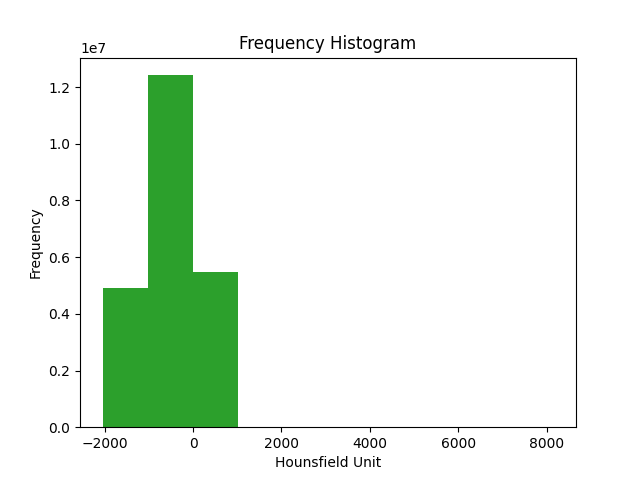

In [30]:


volume = data.to_volume()
plt.hist(volume.flatten())
plt.gca().set(title='Frequency Histogram', ylabel='Frequency', xlabel='Hounsfield Unit')
plt.show()

In [17]:
import pydicom
import os

read_dcm = pydicom.dcmread(os.path.join(path,'1-01.dcm'))

In [18]:
read_dcm

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.305457156046178667359366041284
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.22213.1.143
(0002, 0013) Implementation Version Name         SH: '0.5'
(0002, 0016) Source Application Entity Title     AE: 'POSDA'
-------------------------------------------------
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.6279.6001.305457156046178667359366041284
(0008, 0020) Study Date                 

In [28]:
import scipy
resample(np.array(images),[0.65,0.65])

C:\Users\user\AppData\Local\Temp\ipykernel_4504\2866761384.py:15: DeprecationWarning: Please use `zoom` from the `scipy.ndimage` namespace, the `scipy.ndimage.interpolation` namespace is deprecated.
  image = scipy.ndimage.interpolation.zoom(image, real_resize_factor, mode='nearest')


RuntimeError: sequence argument must have length equal to input rank

In [35]:
import pylidc as pl
from pylidc.utils import volume_viewer

ann = pl.query(pl.Annotation).first()
vol = ann.scan.to_volume()
vol [vol == -2000] = 0

Loading dicom files ... This may take a moment.


In [37]:
vol [vol == -2048] = 0
print(vol)

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [ ]:
resam